# 0. Import Lib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from itertools import combinations
import pickle


%load_ext autoreload
%autoreload 2
%matplotlib widget

from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
)

from time import time_ns
from datetime import datetime
from amftrack.pipeline.launching.run_super import (
    run_parallel,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
import sys
import os

from amftrack.util.sys import get_dirname, temp_path
import pandas as pd
import ast
from scipy import sparse
import scipy.io as sio
import cv2
import imageio.v2 as imageio
import numpy as np
import scipy.sparse
import os
from time import time
from amftrack.pipeline.functions.image_processing.extract_skel import (
    extract_skel_new_prince,
    run_back_sub,
    bowler_hat,
)

from amftrack.util.sys import get_dates_datetime, get_dirname
import shutil
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
    load_graphs,
    Edge,
    Node,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    reconstruct_image_from_general,
    plot_full,
    plot_edge_color_value,
)
from matplotlib import cm
from matplotlib.patches import Rectangle
from IPython.display import clear_output
import re

import sys
import os
import pandas as pd
import numpy as np
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
from tifffile import imwrite
from tqdm import tqdm
import scipy
import matplotlib as mpl
from pathlib import Path
from amftrack.pipeline.launching.run import (
    run_transfer,
)
from amftrack.pipeline.launching.run_super import run_parallel_transfer
import dropbox
from amftrack.util.dbx import (
    upload_folder,
    download,
    read_saved_dropbox_state,
    save_dropbox_state,
    load_dbx,
    get_dropbox_video_folders,
    download_video_folders_drop,
    download_analysis_folders_drop,
)
from subprocess import call
import logging
import datetime
import glob
import json
from amftrack.pipeline.launching.run_super import run_parallel_flows
from amftrack.util.dbx import upload
# from amftrack.pipeline.functions.image_processing.extract_width_fun import extract_section_profiles_for_edge_exp
import networkx as nx
import random
from scipy.optimize import curve_fit
import cv2

mpl.rcParams["figure.dpi"] = 60

/Users/amin/Documents/AMOLF/AMFTravellingWave/venvamf/lib/python3.11/site-packages/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


# 1. Import Graph

## 1.1 Import Data

In [2]:
# To Change according to your need
directory_targ = r"/Users/amin/Documents/AMOLF/Data/Prince/"
plates = ["482_20230908"]
first_index = 0
last_index = 20

update_plate_info(directory_targ, local=True, strong_constraint=False)
all_folders = get_current_folders(directory_targ, local=True)

folders = all_folders.loc[all_folders["unique_id"] == plates[0]]
folders = folders.loc[folders["/Analysis/nx_graph_pruned_width.p"] == True]

folders = folders.sort_values(by="datetime")

exp = Experiment(directory_targ)
exp.dimX_dimY = 0, 0

try:
    exp.load(folders.iloc[first_index:last_index+1].copy(), suffix="_width")
except:
    pass

analysed:   0%|          | 0/54 [00:00<?, ?it/s]

2023-09-08 14:39:00
2023-09-08 18:38:00
2023-09-08 20:39:00
2023-09-08 22:39:00
2023-09-09 00:39:00
2023-09-09 02:39:00
2023-09-09 04:39:00
2023-09-09 06:37:00
2023-09-09 08:39:00
2023-09-09 10:39:00
2023-09-09 12:39:00
2023-09-09 14:39:00
2023-09-09 16:39:00
2023-09-09 18:37:00
2023-09-09 20:39:00
2023-09-09 22:39:00
2023-09-10 00:39:00
2023-09-10 02:39:00
2023-09-10 04:39:00
2023-09-10 06:37:00
2023-09-10 08:39:00


## 1.2 Plot t=0

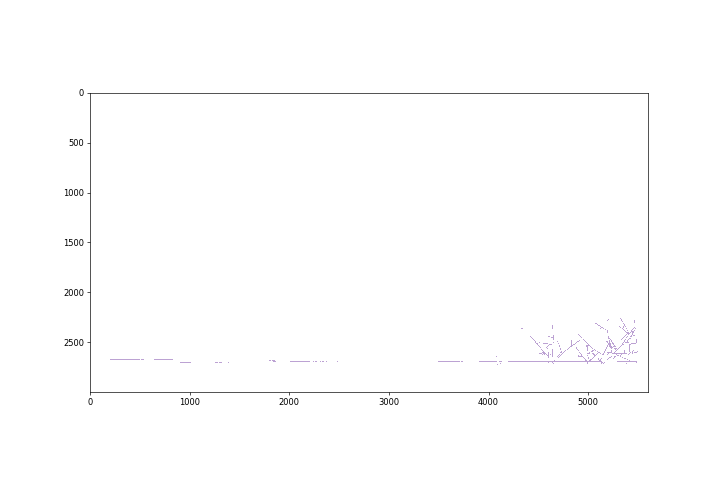

In [6]:
dpi = 400

vmax = 1
vmin = 0
downsizing = 10
plt.close("all")
fig, ax = plot_edge_color_value(
    exp,
    first_index,
    lambda edge: 1,
    cmap=mpl.colormaps.get_cmap("seismic"),
    v_min=vmin,
    v_max=vmax,
    show_background=False,
    dilation=5,
    figsize=(12, 8),
    downsizing=downsizing,
    region=[[0, 0], [30000, 56000]]
)

## 1.3 Plot t=last_inde

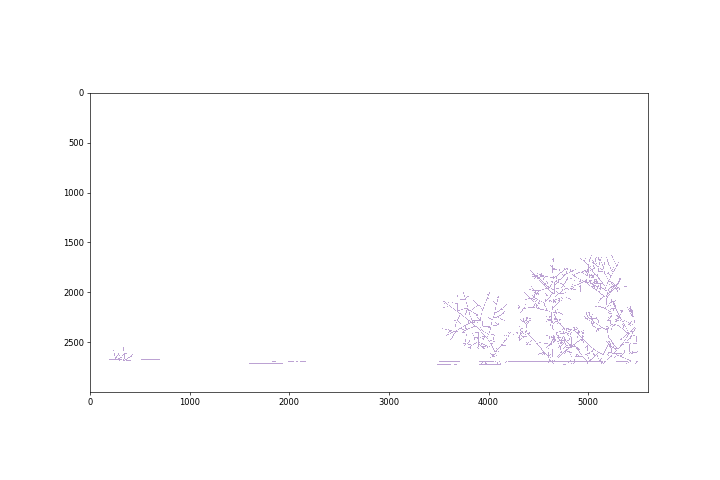

In [7]:
dpi = 400

vmax = 1
vmin = 0
downsizing = 10
plt.close("all")
fig, ax = plot_edge_color_value(
    exp,
    last_index,
    lambda edge: 1,
    cmap=mpl.colormaps.get_cmap("seismic"),
    v_min=vmin,
    v_max=vmax,
    show_background=False,
    dilation=5,
    figsize=(12, 8),
    downsizing=downsizing,
    region=[[0, 0], [30000, 56000]]
)

## 1.4 Video of a region

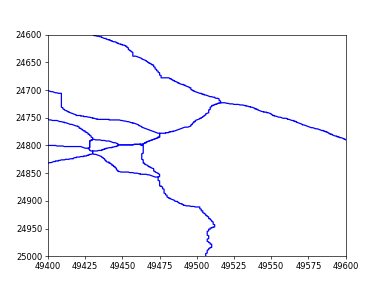

In [105]:
region = [[24600, 49400], [25000, 49600]]
image_folder = "/Users/amin/Documents/AMOLF/Data/Examples/Weird_time_intersection"

def is_in_region(pos, region):
        if region[0][0] < pos[0] and pos[0] < region[1][0] and region[0][1] < pos[1] and pos[1] < region[1][1]:
            return True
        return False

for t in range(last_index+1):
    plt.close("all")

    for edge in get_all_edges(exp, t):
        if is_in_region(edge.begin.pos(t), region) or is_in_region(edge.end.pos(t), region):
            y, x = zip(*edge.pixel_list(t))
            plt.plot(x, y, color="b")

    plt.xlim(region[0][1], region[1][1])
    plt.ylim(region[1][0], region[0][0])
    image_path = os.path.join(image_folder, f'{t:02d}.png')
    plt.savefig(image_path)

In [106]:
video_name = 'test.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
images.sort()
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video_path = os.path.join(image_folder, video_name)
video = cv2.VideoWriter(video_path, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()
print('Video_saved')

Video_saved


# 2. Segmented graph with time

## 2.1 Cut each edge into segments

In [3]:
# Size of the segment in pixels
segments_length = 5

final_graph = exp.nx_graph[last_index]
label = max(final_graph.nodes) + 1
graph_segemented_final = nx.empty_graph()
nodes_pos = {}
edges_indexes = {}
segments_index = {}
segments_center_final = []

for edge in final_graph.edges:
    e = Edge(Node(edge[0], exp), Node(edge[1], exp), exp)
    edges_indexes[f"{edge[0]},{edge[1]}"] = []
    pixels = e.pixel_list(last_index)
    length = len(pixels)
    if length < segments_length:
        graph_segemented_final.add_edge(edge[0], edge[1])
        segments_index[f"{edge[0]},{edge[1]}"] = len(segments_center_final)
        edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
        central_point = np.mean(np.array(pixels), axis=0)
        segments_center_final.append(central_point)
        nodes_pos[edge[0]] = pixels[0]
        nodes_pos[edge[1]] = pixels[-1]
        continue

    for i in range(0, length, segments_length):
        sub_list = pixels[i:i+segments_length]
        if i==0:
            graph_segemented_final.add_edge(edge[0], label)
            segments_index[f"{edge[0]},{label}"] = len(segments_center_final)
            edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
            central_point = np.mean(np.array(sub_list), axis=0)
            segments_center_final.append(central_point)
            nodes_pos[edge[0]] = sub_list[0]
            nodes_pos[label] = sub_list[-1]
            label += 1
        elif i+segments_length >= length:
            graph_segemented_final.add_edge(label-1, edge[1])
            segments_index[f"{label-1},{edge[1]}"] = len(segments_center_final)
            edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
            central_point = np.mean(np.array(sub_list), axis=0)
            segments_center_final.append(central_point)
            nodes_pos[edge[1]] = sub_list[-1]
        else:
            graph_segemented_final.add_edge(label-1, label)
            segments_index[f"{label-1},{label}"] = len(segments_center_final)
            edges_indexes[f"{edge[0]},{edge[1]}"].append(len(segments_center_final))
            central_point = np.mean(np.array(sub_list), axis=0)
            segments_center_final.append(central_point)
            nodes_pos[label] = sub_list[-1]
            label += 1

print(f"amount of nodes: {graph_segemented_final.number_of_nodes()}")
print(f"amount of segments: {graph_segemented_final.number_of_edges()}")

array_segments_center_final = np.array(segments_center_final)
shape_segments_center = array_segments_center_final.shape
print(f"Shape array_segments_center_final: {shape_segments_center}")

amount of nodes: 94890
amount of segments: 95095
Shape array_segments_center_final: (95095, 2)


## 2.2 Min distances over time of each segment while shifting them

In [4]:
def closest_point(point, points):
    dist_square = np.sum((points-point)**2, axis=1)
    min_index = np.argmin(dist_square)
    return points[min_index], dist_square[min_index]

In [5]:
# When there is a point at a distance of segment under the threshold, the segment is activated (distance in pixel)
# A good distance is (2*segments_length)**2
# Don't forget to square because closest_point give the distance squared
threshold = 10**2

segments_centers = []
segments_min_distances = []
array_segments_center = array_segments_center_final.copy()
for time in reversed(range(last_index+1)):
    print(f"Process time {time}")
    rows = []
    cols = []
    previous_edges = get_all_edges(exp, time)
    for edge in previous_edges:
        p_list = edge.pixel_list(time)
        row, col = zip(*p_list)
        rows.extend(row)
        cols.extend(col)
    
    data = np.ones(len(rows))
    points_matrix = sparse.csr_matrix((data, (rows, cols)))
    
    centers_distance = []
    new_centers = array_segments_center.copy()
    for index, center in enumerate(array_segments_center):
        xc, yc = center
        xc, yc = int(xc), int(yc)

        min_x, max_x = max(0, xc-4*segments_length), xc+4*segments_length
        min_y, max_y = max(0, yc-4*segments_length), yc+4*segments_length
        coords = points_matrix[min_x:max_x, min_y:max_y].nonzero()
        coords = np.column_stack(coords)
        if not coords.shape[0]:
            centers_distance.append(32*(segments_length**2))
            continue

        xc -= min_x
        yc -= min_y

        new_center, min_dist = closest_point([xc, yc], coords)
        centers_distance.append(min_dist)
        if min_dist < threshold:
            new_centers[index] = new_center + np.array([min_x, min_y])
    
    array_segments_center = new_centers
    segments_centers.append(new_centers)
    segments_min_distances.append(centers_distance)

segments_min_distances.reverse()
# Index t are the centers of the segments at time t
segments_centers.reverse()

Process time 20
Process time 19
Process time 18
Process time 17
Process time 16
Process time 15
Process time 14
Process time 13
Process time 12
Process time 11
Process time 10
Process time 9
Process time 8
Process time 7
Process time 6
Process time 5
Process time 4
Process time 3
Process time 2
Process time 1
Process time 0


## 2.3 Each edge time interval

In [6]:
# Amount of segment to look for at in an edge to get the date at which the edge encounter the node
# Depends of how big segments are and what threshold you use
amount_of_border_segment = 7

segments_min_distances_array = np.array(segments_min_distances)
segments_min_distances_array = np.where(segments_min_distances_array<threshold, 1, 0)
segments_time = segments_min_distances_array.argmax(axis=0)

edges_time_interval = {}

for edge in get_all_edges(exp, last_index):
    segments_indexes = edges_indexes[f"{edge.begin.label},{edge.end.label}"]
    segments_times = np.array([segments_time[index] for index in segments_indexes])

    begin = np.median(segments_times[:amount_of_border_segment])
    if len(segments_times)>amount_of_border_segment:
        end = np.median(segments_times[-amount_of_border_segment:])
    else:
        end = np.median(segments_times)

    edges_time_interval[f"{edge.begin.label},{edge.end.label}"] = (begin, end)

print(edges_time_interval)

{'3900,3902': (5.0, 0.0), '3942,3951': (16.0, 16.0), '3984,3986': (16.0, 16.0), '3986,3951': (16.0, 16.0), '3986,4441': (16.0, 17.0), '3986,3982': (16.0, 16.0), '3429,3870': (20.0, 18.0), '3870,3652': (19.0, 20.0), '3870,3902': (18.0, 0.0), '3652,3580': (20.0, 20.0), '3652,3852': (20.0, 19.0), '3902,3904': (0.0, 0.0), '3902,3951': (0.0, 17.0), '3904,3946': (0.0, 16.0), '3904,3338': (0.0, 20.0), '3951,3982': (16.0, 16.0), '3982,3997': (16.0, 16.0), '3982,3946': (16.0, 16.0), '3946,3956': (16.0, 16.0), '3906,3921': (0.0, 0.0), '4497,3992': (17.0, 16.0), '3992,4545': (16.0, 16.0), '3992,3957': (16.0, 16.0), '3531,3912': (20.0, 0.0), '3962,4009': (17.0, 16.0), '3914,3801': (0.0, 19.0), '3969,3960': (16.0, 1.0), '3801,3640': (19.0, 20.0), '3801,3836': (20.0, 20.0), '3917,3965': (0.0, 1.0), '3964,3965': (1.0, 1.0), '3965,3925': (1.0, 1.0), '3925,3923': (1.0, 1.0), '3925,3970': (1.0, 1.0), '3923,3943': (1.0, 0.0), '3923,3970': (1.0, 1.0), '3970,3988': (1.0, 16.0), '4638,4642': (16.0, 16.0), '

## 2.4 Plot random segments min_dist

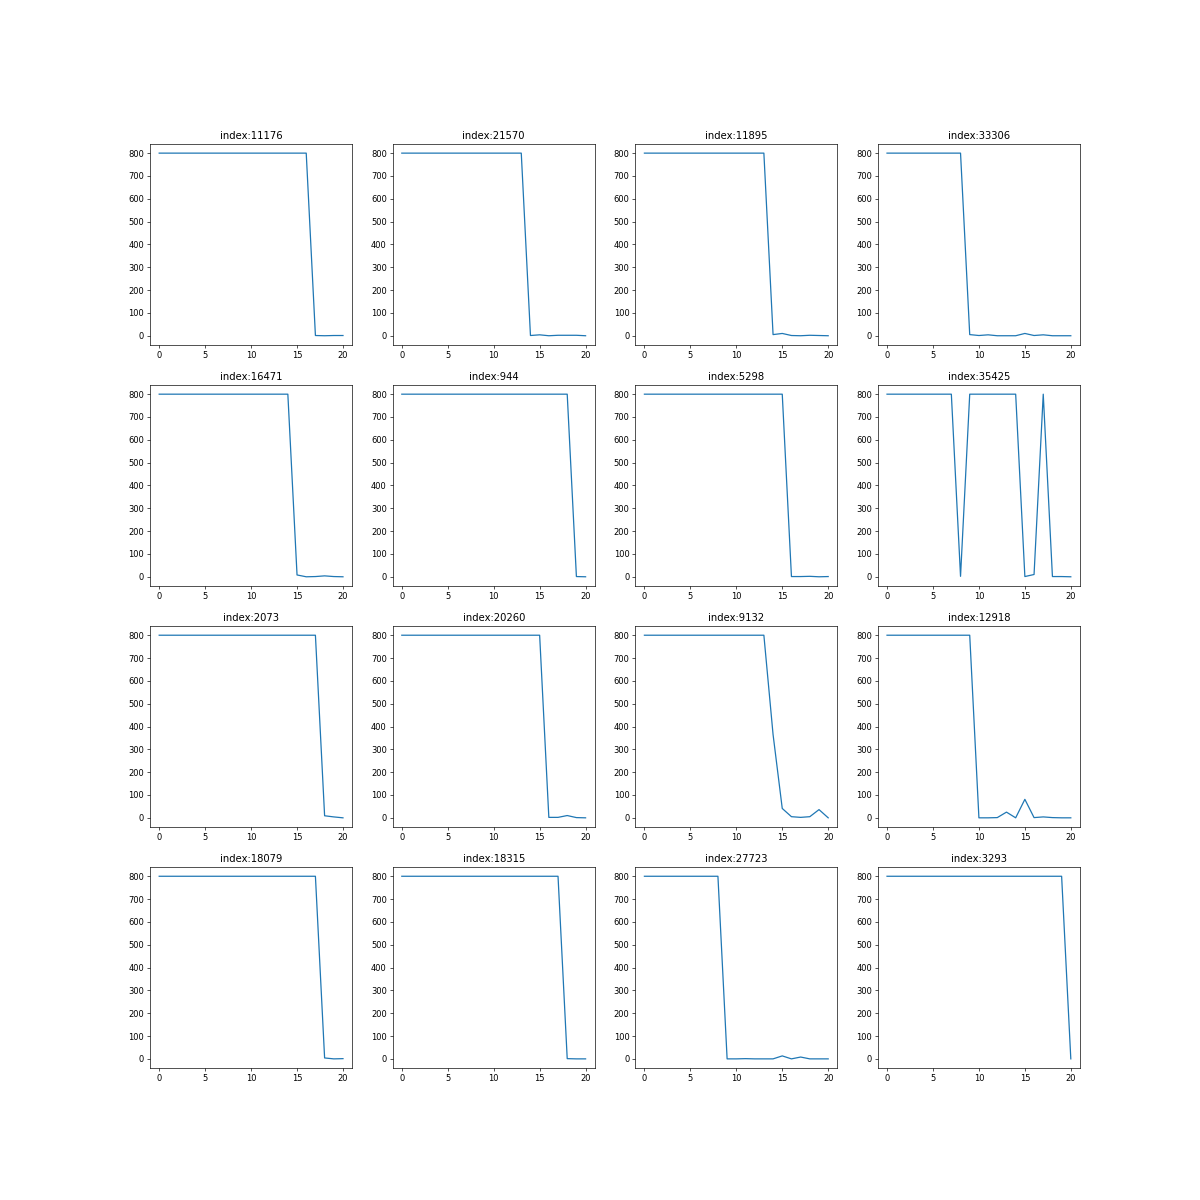

In [52]:
plt.close("all")
plt.figure(figsize=(20,20))

good_segments = []
for key, index in segments_index.items():
    y, x = segments_center_final[index]
    if y < 22000:
        good_segments.append(index)


for i in range(16):
    plt.subplot(4,4,i+1)
    times = []
    distance = []
    randint = random.randint(0, len(good_segments))
    for t, activations in enumerate(segments_min_distances):
        times.append(t)
        distance.append(activations[good_segments[randint]])

    plt.plot(times, distance)
    plt.title(f"index:{randint}")

## 2.5 Plot Each Segments colored by its activation time

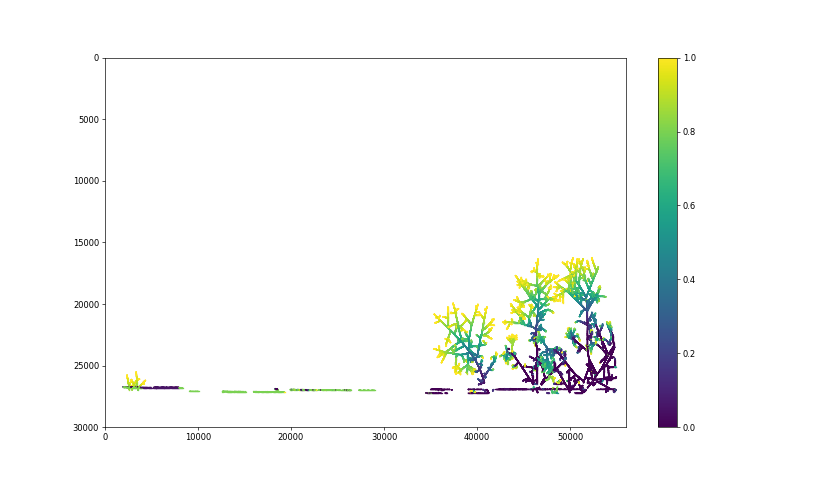

In [59]:
plt.close("all")
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8)) 

for key, edge in enumerate(graph_segemented_final.edges):
    begin, end = edge
    (y1, x1), (y2, x2) = nodes_pos[begin], nodes_pos[end]
    index = segments_index.get(f"{begin},{end}")
    if index is None:
        index = segments_index[f"{end},{begin}"]
    time = segments_time[index]
    color = cm.viridis(time/last_index)
    if time < 100:
    
        ax1.plot([x1, x2], [y1, y2], c=color)

sm = plt.cm.ScalarMappable(cmap=cm.viridis) 
sm.set_array([]) 
plt.colorbar(sm, ax=ax1) 

plt.xlim(0, 56000)
plt.ylim(0, 30000)
plt.gca().invert_yaxis()

## 2.6 Plot each edge colored by its activation time

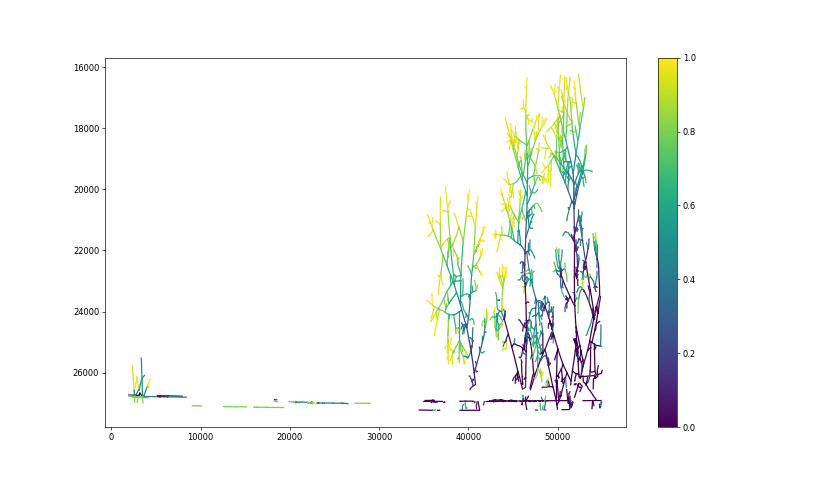

In [54]:
plt.close("all")
fig, ax1 = plt.subplots(1, 1, figsize=(14, 8))

for edge in get_all_edges(exp, last_index):
    time_interval = edges_time_interval.get(f"{edge.begin.label},{edge.end.label}")
    time = (time_interval[0]+time_interval[1])/2 # type: ignore
    pixels = edge.pixel_list(last_index)
    y, x = zip(*pixels)
    color = cm.viridis(time/last_index)
    plt.plot(x, y, color=color)

sm = plt.cm.ScalarMappable(cmap=cm.viridis)
sm.set_array([]) 
plt.colorbar(sm, ax=ax1) 

plt.gca().invert_yaxis()

# 3. HyperGraph

## 3.1 Functions

In [7]:
import networkx as nx
import numpy as np
from tqdm.notebook import tqdm  # for Jupyter notebook or IPython

positions = exp.positions[last_index]

def angle_between(vec1, vec2):
    dot_product = np.dot(vec1, vec2)
    norm_product = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return np.arccos(np.clip(dot_product / norm_product, -1.0, 1.0))

def score_angle(v1, v2, v, positions):
    vec1 = np.array(positions[v1]) - np.array(positions[v])
    vec2 = np.array(positions[v2]) - np.array(positions[v])
    angle = np.abs(angle_between(vec1, vec2) - np.pi)
    return angle

def score(v1, v2, v, positions, edges_time_interval):
    vec1 = np.array(positions[v1]) - np.array(positions[v])
    vec2 = np.array(positions[v2]) - np.array(positions[v])
    angle = np.abs(angle_between(vec1, vec2) - np.pi)

    time_interval1 = edges_time_interval.get(f"{v1},{v}")
    if time_interval1 is None:
        time1, _ = edges_time_interval[f"{v},{v1}"]
    else:
        time1 = time_interval1[1]
    time_interval2 = edges_time_interval.get(f"{v2},{v}")
    if time_interval2 is None:
        time2, _ = edges_time_interval[f"{v},{v2}"]
    else:
        time2 = time_interval2[1]

    time_diff = np.abs(time1-time2)

    return -2*angle/np.pi - time_diff


def relation(v, e1, e2, EExtract, E, positions, edges_time_interval):
    v_i = E[e1][0] if E[e1][1] == v else E[e1][1]
    v_j = E[e2][0] if E[e2][1] == v else E[e2][1]

    time_score_ij = score(v_i, v_j, v, positions, edges_time_interval)

    # Check the second condition
    for e in EExtract:
        if e != e1 and e != e2:
            v_k = E[e][0] if E[e][1] == v else E[e][1]

            time_score_vi = score(v_i, v_k, v, positions, edges_time_interval)
            time_score_vj = score(v_j, v_k, v, positions, edges_time_interval)
            if (time_score_ij < time_score_vi or time_score_ij< time_score_vj):
                return False
            if time_score_ij==time_score_vi or time_score_ij==time_score_vj:
                print('equal')
    return True


def edge_matches(v, EExtract, E, positions, edges_time_interval) -> list:
    if len(EExtract) < 2:
        return []

    times = []
    vs = []
    for e in EExtract:
        v_i =  E[e][0] if E[e][1] == v else E[e][1]
        time_interval = edges_time_interval.get(f"{v_i},{v}")
        if time_interval is None:
            time, _ = edges_time_interval[f"{v},{v_i}"]
        else:
            time = time_interval[1]
        vs.append(v_i)
        times.append(time)

    min_time = min(times)
    min_time_edges = [index for index, time in enumerate(times) if time==min_time]

    if len(min_time_edges)==2:
        e1 = EExtract[min_time_edges[0]]
        e2 = EExtract[min_time_edges[1]]
        return [(e1, e2, 'time_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    if len(min_time_edges) >= 2:
        pairs = combinations(min_time_edges, 2)
        angle = np.pi
        for index1, index2 in pairs:
            angle_between = score_angle(vs[index1], vs[index2], v, positions)
            if angle_between < angle:
                angle = angle_between
                e1 = EExtract[index1]
                e2 = EExtract[index2]
        return [(e1, e2, 'geometricaly_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    min_time_edge = min_time_edges[0]
    second_min_time = min([time for time in times if time!=min_time])
    second_time_edges = [index for index, time in enumerate(times) if time==second_min_time]
    
    if len(second_time_edges)==1:
        e1 = EExtract[min_time_edge]
        e2 = EExtract[second_time_edges[0]]
        return [(e1, e2, 'time_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)

    e1 = EExtract[min_time_edge]
    angle = np.pi
    for index in second_time_edges:
        angle_between = score_angle(vs[min_time_edge], vs[index], v, positions)
        if angle_between < angle:
            angle = angle_between
            e2 = EExtract[index]

    return [(e1, e2, 'geometricaly_resolved')] + edge_matches(v, [edge_index for edge_index in EExtract if (edge_index!=e1 and edge_index!=e2)], E, positions, edges_time_interval)


def hypergraph_from_graph(G, positions, edges_time_interval, get_time_resolved_intersections=False):
    V = list(G.nodes())
    E = list(G.edges())
    e = len(E)
    v = len(V)

    H = [0] * e
    Cor = [[0] * 10 for _ in range(e)]

    if get_time_resolved_intersections:
        time_resolved_intersections = []

    # STEP 1
    for i in tqdm(V, desc="Processing vertices"):
        EExtract = [edge_idx for edge_idx, edge in enumerate(E) if i in edge]
        matches = edge_matches(i, EExtract, E, positions, edges_time_interval)
        for match in matches:
            e1, e2 = match[0], match[1]
            Cor[e1][Cor[e1].index(0)] = e2
            Cor[e2][Cor[e2].index(0)] = e1
        if get_time_resolved_intersections and matches and matches[0][2]=='time_resolved':
            time_resolved_intersections.append((EExtract, matches[0][0], matches[0][1], positions[i]))

    # STEP 2
    CurrentMark = 1
    for i in tqdm(range(e), desc="Processing stack"):
        if H[i] == 0:
            stack = [i]
            visited = set()  # To keep track of edges that have been added to the stack
            while stack:
                current = stack.pop()
                H[current] = CurrentMark
                # Only add edges to the stack that haven't been assigned to a hyperedge and aren't already on the stack
                related_edges = [
                    cor
                    for cor in Cor[current]
                    if cor != 0 and H[cor] == 0 and cor not in visited
                ]
                stack.extend(related_edges)
                visited.update(related_edges)
            CurrentMark += 1
    H = {edge: H[i] for i, edge in enumerate(E)}
    if get_time_resolved_intersections:
        return H, time_resolved_intersections
    return H

## 3.2 Instanciation

In [8]:
# Example usage
G = exp.nx_graph[last_index]
E = list(G.edges())

# Add edges to G...
H = hypergraph_from_graph(G, positions, edges_time_interval)
H = {Edge(Node(edge[0], exp), Node(edge[1], exp), exp): H[edge] for edge in H.keys()}

Processing vertices:   0%|          | 0/3520 [00:00<?, ?it/s]

Processing stack:   0%|          | 0/1862 [00:00<?, ?it/s]

## 3.3 Plot

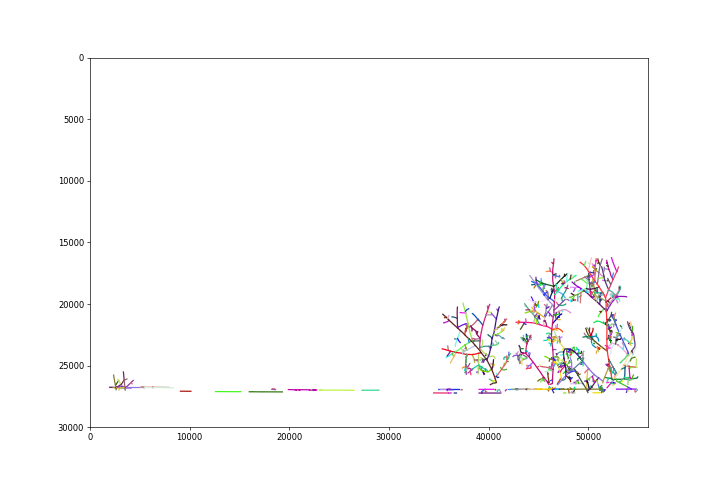

In [9]:
plt.close('all')
fig, ax1 = plt.subplots(1, 1, figsize=(12, 8))

def random_color():
    return tuple(random.random() for _ in range(3))

colors = {}
for _, value in H.items():
    colors[value] = random_color()

for edge, value in H.items():
    pixels = edge.pixel_list(last_index)
    x, y = zip(*pixels)
    plt.plot(y, x, color=colors[value])

plt.xlim(0, 56000)
plt.ylim(0, 30000)
plt.gca().invert_yaxis()